In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(735.5), np.float64(1594.5), np.float64(-0.5))

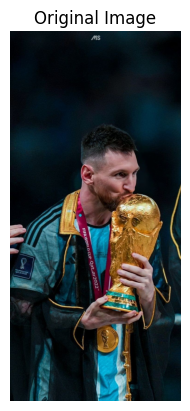

In [ ]:
img = plt.imread('mm.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.axis("off")

(np.float64(-0.5), np.float64(735.5), np.float64(1594.5), np.float64(-0.5))

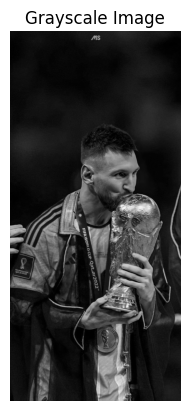

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis("off")

(np.float64(-0.5), np.float64(735.5), np.float64(1594.5), np.float64(-0.5))

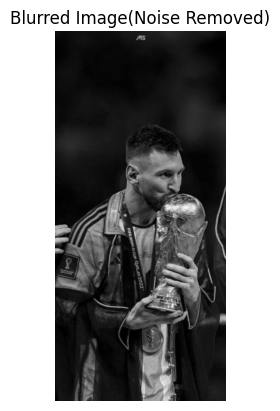

In [18]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blur, cmap='gray')
plt.title('Blurred Image(Noise Removed)')
plt.axis("off")

sobel

In [19]:
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

sobel = np.sqrt(sobel_x**2 + sobel_y**2)
sobel = np.uint8(sobel)


array([[ 0., -4.,  0., ...,  0.,  4.,  0.],
       [ 0., -3.,  0., ...,  0.,  4.,  0.],
       [ 0., -2.,  0., ...,  0.,  5.,  0.],
       ...,
       [ 0., -4., -4., ...,  3.,  3.,  0.],
       [ 0., -4., -4., ...,  4.,  4.,  0.],
       [ 0., -4., -4., ...,  4.,  4.,  0.]], shape=(1595, 736))

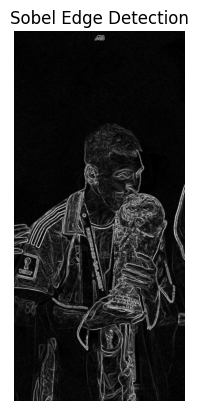

In [20]:
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis("off")

sobel_x

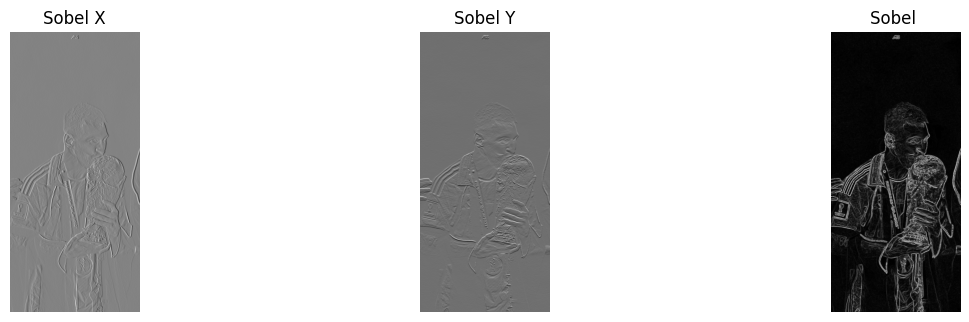

In [21]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel ')
plt.axis("off")

plt.show()

Canny


(np.float64(-0.5), np.float64(735.5), np.float64(1594.5), np.float64(-0.5))

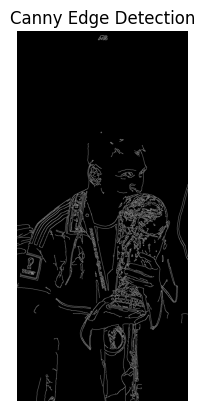

In [22]:
edges = cv2.Canny(blur, threshold1=50, threshold2=150)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis("off")

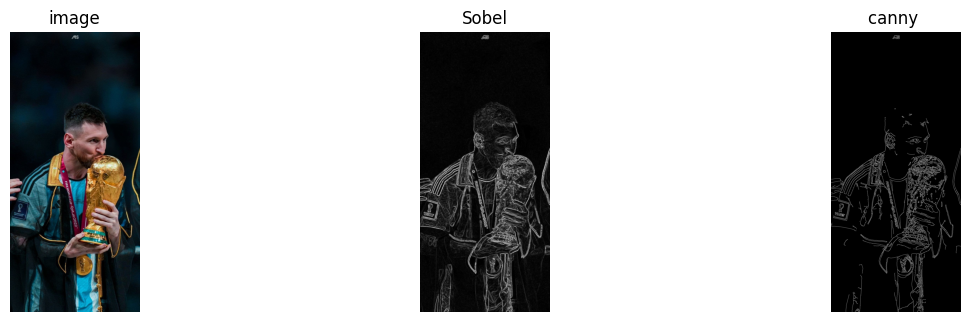

In [23]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('image')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('canny ')
plt.axis("off")

plt.show()

Pencil Sketch

(np.float64(-0.5), np.float64(735.5), np.float64(1594.5), np.float64(-0.5))

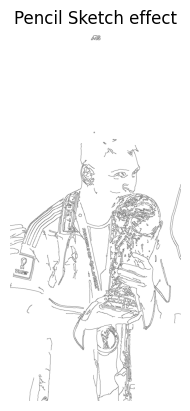

In [24]:
inv_edges = cv2.bitwise_not(edges)

plt.imshow(inv_edges, cmap='gray')
plt.title('Pencil Sketch effect')
plt.axis("off")

Bilateral


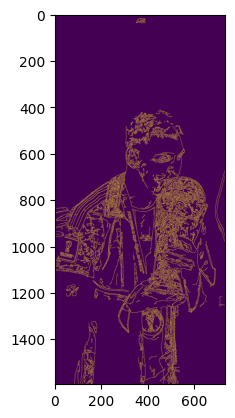

In [25]:
color = cv2.bilateralFilter(img, 9 , 50 , 50)
edges = cv2.Canny(gray , 50 , 150)
edges_inv = cv2.bitwise_not(edges)

plt.imshow(edges)

Cartoon

(np.float64(-0.5), np.float64(735.5), np.float64(1594.5), np.float64(-0.5))

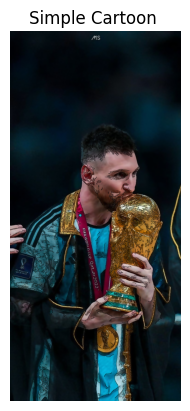

In [26]:
edges_inv = cv2.cvtColor(edges_inv, cv2.COLOR_GRAY2RGB)
cartoon = cv2.bitwise_and(color, edges_inv)

plt.imshow(cartoon)
plt.title('Simple Cartoon ')
plt.axis("off")

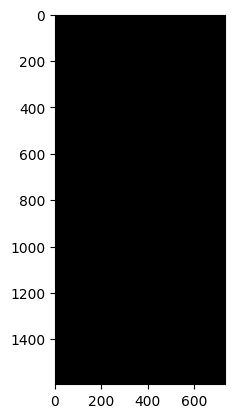

In [27]:
image = np.zeros_like(img)

plt.imshow(image)

In [28]:
image.shape

(1595, 736, 3)

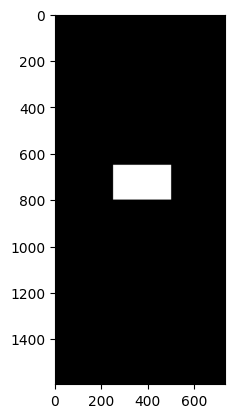

In [29]:
image[650:800 , 250:500] = [255, 255 , 255]

plt.imshow(image)

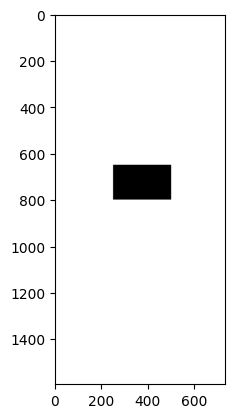

In [30]:
plt.imshow(cv2.bitwise_not(image))

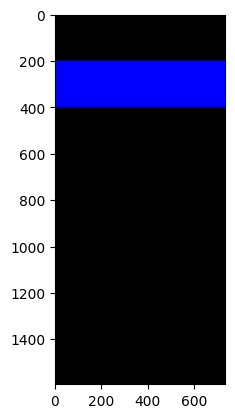

In [31]:
image2 = np.zeros_like(img)
image2[200:400 , :]=[0,0,255]

plt.imshow(image2)

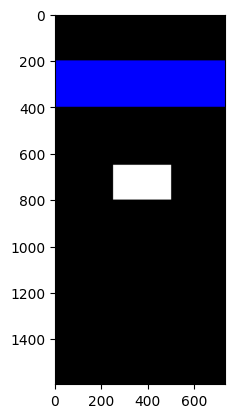

In [32]:
plt.imshow(cv2.bitwise_or(image, image2))

Neon Edge

(np.float64(-0.5), np.float64(735.5), np.float64(1594.5), np.float64(-0.5))

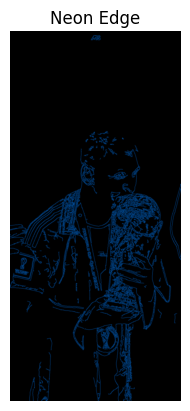

In [33]:
edges = cv2.Canny(gray, 80, 200)
edges_blur = cv2.GaussianBlur(edges, (5, 5), 0)
neon = np.zeros_like(img)

neon[:, :, 0] = edges_blur*0.0 # red
neon[:, :, 1] = edges_blur*0.5 #green
neon[:, :, 2] = edges_blur*1   #blue

neon= np.clip(neon, 0, 255).astype(np.uint8)

plt.imshow(neon)
plt.title('Neon Edge')
plt.axis("off")

(np.float64(-0.5), np.float64(735.5), np.float64(1594.5), np.float64(-0.5))

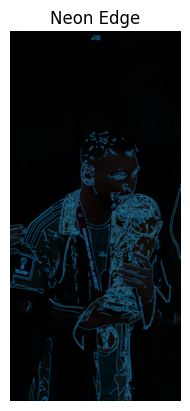

In [34]:
edges = cv2.Canny(gray, 100, 250)
edges = cv2.GaussianBlur(edges, (7, 7), 0)

neon[:, :, 0] = edges_blur*0.1 # red
neon[:, :, 1] = edges_blur*0.8 #green
neon[:, :, 2] = edges_blur*1.2 #blue

neon= np.clip(neon, 0, 255).astype(np.uint8)



neon_mix = cv2.addWeighted(img, 0.1, neon, 0.9, 0)
plt.imshow(neon_mix)
plt.title('Neon Edge')
plt.axis("off")

In [35]:
img = plt.imread('../images/raw/1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

In [36]:
Z = img.reshape((-1 , 3))
Z = np.float32(Z)

K = 20
_, lable, center = cv2.kmeans(
    Z, K, None,
    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10 ,1.0),
    10,
    cv2.KMEANS_RANDOM_CENTERS
)

center = np.uint8(center)
quantized = center[lable.flatten()]
quantized = quantized.reshape(img.shape)

In [37]:
edges = cv2.Canny(gray, 80, 200)

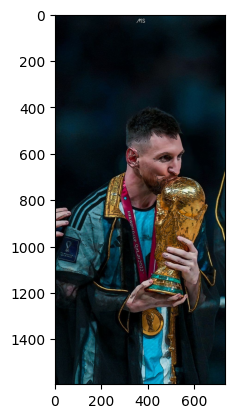

In [38]:
edges_inv = cv2.bitwise_not(edges)
edges_inv = cv2.cvtColor(edges_inv, cv2.COLOR_GRAY2RGB)
edges_inv = cv2.bilateralFilter(edges_inv, 9, 75, 75)

cartoon = cv2.bitwise_and(img, edges_inv)

plt.imshow(cartoon)
